## Куприхин Дмитрий Альбертович
### 19-ИВТ-2
#### Лабораторная работа 4
#### Вариант 14

In [92]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import pearsonr, spearmanr
%matplotlib inline


In [93]:
at = pd.read_csv('autos.csv', encoding = 'latin1')

at.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [94]:
at.nunique()

dateCrawled            280500
name                   233531
seller                      2
offerType                   2
price                    5597
abtest                      2
vehicleType                 8
yearOfRegistration        155
gearbox                     2
powerPS                   794
model                     251
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               114
nrOfPictures                1
postalCode               8150
lastSeen               182806
dtype: int64

In [95]:
#удаляем столбец nrOfPictures т.к он содержит только значение 0
at.drop(['nrOfPictures'], axis=1, inplace=True)

### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

1. dateCrawled -дата сканирования 
2. name - марка машины
3. seller - продавец
4. offerType - тип предложения 
5. price стоимость
6. abtest тест
7. vehicleType тип машины
8. yearOfRegistration - год регистрации
9. gearbox - коробка передач 
10. powerPS - мощность машины
11. model - модель
12. kilometer - пробег
13. monthOfRegistration - месяц регистрации
14. fuelType - тип топлива
15. notRepairedDamage - не отремонтированный ущерб
16. dateCreated - дата создания
17. nrOfPictures - количество изображения 
18. postalCode - почтовый индекс
19. lastSeen - последняя запись


### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [96]:
at.shape # до удаления

(371528, 19)

In [97]:
at.drop_duplicates(keep = 'first', inplace = True)
at.shape # после удаления 

(371524, 19)

### 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [98]:
#удаляем столбцы, которые не относятся ни к каким признакам 
at.drop(['name', 'dateCrawled', 'postalCode', 'lastSeen', 'dateCreated', 'model'],axis=1, inplace=True)

#поиск количественных признаков 
numerical = [i for i in at.columns if at[i].dtype.name != 'object']
print(f"Numerical: {numerical}")

Numerical: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']


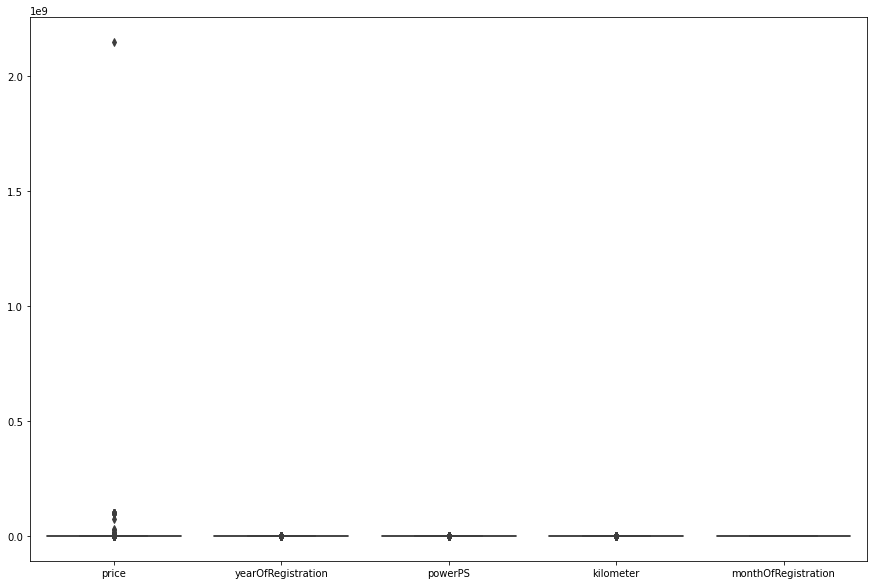

In [99]:
plt.figure(figsize=(15,10))
sns.boxplot(data=at[numerical])
plt.show()#до масштабирования 

<AxesSubplot:>

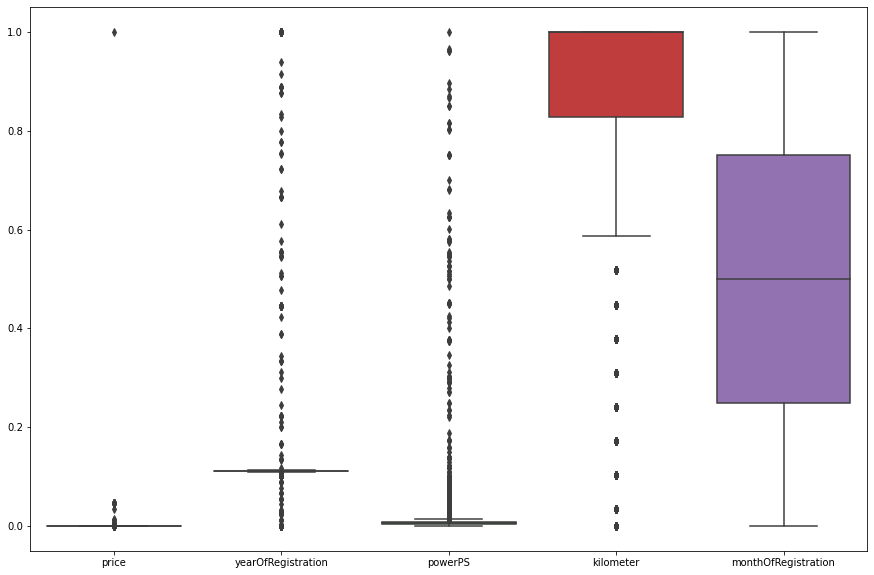

In [100]:
#масштабирование стандартизацией
standart = preprocessing.MinMaxScaler()
plt.figure(figsize=(15,10))

at[numerical] = standart.fit_transform(at[numerical].values.astype(float))
sns.boxplot(data=at[numerical])

## 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [101]:
#поиск категориальных признаков
categorial = [i for i in at.columns if at[i].dtype.name == 'object']
print('categorial: ', categorial)

categorial:  ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [102]:
#Разделение категориальных признаков на бинарные и небинарные
binary = [c for c in categorial if len(at[c].unique()) == 2]
nonbinary = [c for c in categorial if len(at[c].unique()) > 2]
print('binary: ', binary)
print('nonbinary: ', nonbinary)

binary:  ['seller', 'offerType', 'abtest']
nonbinary:  ['vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [103]:
at = at.dropna()
#Замена бинарных категориальных признаков 
for columns in [columns for columns in categorial if len(at[columns].unique()) == 2]:
    for i, unic_item in enumerate(at[columns].unique()):
        at[columns] = at[columns].replace(to_replace=[unic_item], value=[i])

In [104]:
at_nonbinary = pd.get_dummies(at[nonbinary])#Замена небинарных категориальных признаков
at.drop(nonbinary, axis=1, inplace=True)#удаляем старые столбцы
at = pd.concat([at, at_nonbinary], axis=1)#добавляем новые
at.head()

,seller,offerType,price,abtest,yearOfRegistration,powerPS,kilometer,monthOfRegistration,gearbox,notRepairedDamage,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
1,0,0,8.521602e-06,0,0.112346,0.00950,0.827586,0.416667,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,6.984919e-07,0,0.111235,0.00375,1.000000,0.500000,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1.676381e-06,0,0.112012,0.00345,0.586207,0.583333,0,1,...,0,1,0,0,0,0,0,0,0,0
5,0,0,3.026798e-07,0,0.110568,0.00510,1.000000,0.833333,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1.024455e-06,0,0.111568,0.00545,1.000000,0.666667,0,1,...,0,0,0,0,0,0,0,0,0,0


## 5.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

                      seller  offerType     price    abtest  \
seller              1.000000  -0.000011 -0.000008  0.000105   
offerType          -0.000011   1.000000 -0.000015  0.000149   
price              -0.000008  -0.000015  1.000000 -0.001821   
abtest              0.000105   0.000149 -0.001821  1.000000   
yearOfRegistration -0.006792  -0.000106 -0.001951  0.001596   
...                      ...        ...       ...       ...   
brand_suzuki       -0.000220  -0.000311 -0.000226  0.001047   
brand_toyota       -0.000326  -0.000461 -0.000318 -0.001161   
brand_trabant      -0.000079  -0.000112 -0.000100 -0.002366   
brand_volkswagen   -0.001391  -0.001968 -0.001269 -0.001729   
brand_volvo        -0.000271  -0.000384 -0.000262  0.002721   

                    yearOfRegistration   powerPS  kilometer  \
seller                       -0.006792 -0.001002  -0.000953   
offerType                    -0.000106 -0.001671   0.002514   
price                        -0.001951  0.010033   0.0

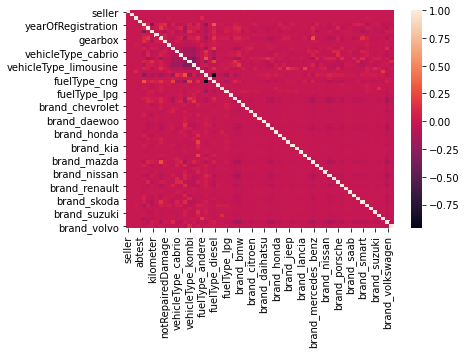

In [105]:
corr_matrix = at.corr()
sns.heatmap(corr_matrix);
print(corr_matrix)

## 6.	Заполните пропущенные значения в данных;

In [106]:
at.isnull().sum()

seller                0
offerType             0
price                 0
abtest                0
yearOfRegistration    0
                     ..
brand_suzuki          0
brand_toyota          0
brand_trabant         0
brand_volkswagen      0
brand_volvo           0
Length: 65, dtype: int64

In [107]:
at.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268008 entries, 1 to 371527
Data columns (total 65 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seller                  268008 non-null  int64  
 1   offerType               268008 non-null  int64  
 2   price                   268008 non-null  float64
 3   abtest                  268008 non-null  int64  
 4   yearOfRegistration      268008 non-null  float64
 5   powerPS                 268008 non-null  float64
 6   kilometer               268008 non-null  float64
 7   monthOfRegistration     268008 non-null  float64
 8   gearbox                 268008 non-null  int64  
 9   notRepairedDamage       268008 non-null  int64  
 10  vehicleType_andere      268008 non-null  uint8  
 11  vehicleType_bus         268008 non-null  uint8  
 12  vehicleType_cabrio      268008 non-null  uint8  
 13  vehicleType_coupe       268008 non-null  uint8  
 14  vehicleType_kleinwag

## 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

### 2 – линейная регрессия, LASSO регуляризатор;

In [108]:
X, y = at.drop(['price'], axis=1), at['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)#разбиваем массив на обучающий подмножества

In [109]:
lasso = Lasso()
params = {'alpha': np.arange(0, 4, 0.1)}
lasso_grid = GridSearchCV(lasso, params)
lasso_grid.fit(X_train, y_train)#обучаем
best_alpha = lasso_grid.best_estimator_.alpha #поиск лучшего значения
print('Best alpha:', best_alpha)

Best alpha: 0.0


In [110]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train,y_train)
pred_las = lasso.predict(X_test)
P, p_value_P = pearsonr(pred_las, y_test)
print("corr Pearson: ", P)
S, p_value_S = spearmanr(pred_las, y_test)
print("corr Spearman: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
print(pred_las[:15] - y_test[:15])

corr Pearson:  0.004765522142233299
corr Spearman:  0.7445551283527948
P_VALUSE_P : 0.17660876168524245
P_VALUSE_S : 0.0
177550    1.848350e-06
8164      6.414397e-07
5300      4.269065e-07
199977    5.586835e-07
196815   -9.299750e-07
174651    7.373823e-06
45849    -7.160788e-07
203652    2.127882e-06
72317    -1.687553e-06
326486   -1.490959e-07
300497    2.256472e-06
183333    1.704335e-06
128759    6.050288e-07
12081    -2.966057e-07
75046    -1.006840e-06
Name: price, dtype: float64


### 3 – линейная регрессия, RIDGE регуляризатор;

In [111]:
ridge = Ridge()
params = {'alpha': np.arange(0, 4, 0.1)}
ridge_grid = GridSearchCV(ridge, params)
ridge_grid.fit(X_train, y_train)
best_alpha = ridge_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.1


In [112]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
pred_rid = ridge.predict(X_test)
P, p_value_P = pearsonr(pred_rid, y_test)
print("corr Pearson: ", P)
S, p_value_S = spearmanr(pred_rid, y_test)
print("corr Spearman: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
print(pred_rid[:15] - y_test[:15])

corr Pearson:  0.004468441451237886
corr Spearman:  0.7217017470085723
P_VALUSE_P : 0.20514381557999045
P_VALUSE_S : 0.0
177550    1.699509e-06
8164      4.841207e-07
5300      2.728085e-07
199977    5.756119e-07
196815   -7.847303e-07
174651    7.470019e-06
45849    -5.906485e-07
203652    2.319097e-06
72317    -1.675308e-06
326486   -3.984765e-07
300497    2.637234e-06
183333    1.791690e-06
128759    5.531124e-07
12081    -2.231846e-07
75046    -1.023387e-06
Name: price, dtype: float64
